<a href="https://colab.research.google.com/github/Dhairya890/GIS-SEM1/blob/main/GIS_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITLE**

### *Exploring Crime, Education, and Population Density: A GIS Project in India*


#**DESCRIPTION**

### *The primary objective of this project is to analyze and compare crime rates and education status across different districts of India. By examining these three critical dimensions – population density, crime rates, and education levels*

#**DATASET SOURCES**

### Population Density Data:

#### https://www.kaggle.com/datasets/imdevskp/india-district-wise-shape-files

## Education Data:

#### https://livingatlas-dcdev.opendata.arcgis.com/datasets/esriindia1::india-education-2014-15/explore?showTable=true

## Crime Data:

#### https://data.gov.in/catalog/district-wise-crimes-under-various-sections-indian-penal-code-ipc-crimes



# IMPORTS

In [2]:
!pip install mapclassify
import mapclassify
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00


# EXTRACTING FILES

In [3]:
! wget -q -O IND.zip https://drive.google.com/uc?id=1opoGF1mPFkiZwwk-rloTDRAprs2gfCn_&export=download
zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Ind = gpd.read_file('INDIA-MAP.shp')

# PLOTTING DATA

<Axes: >

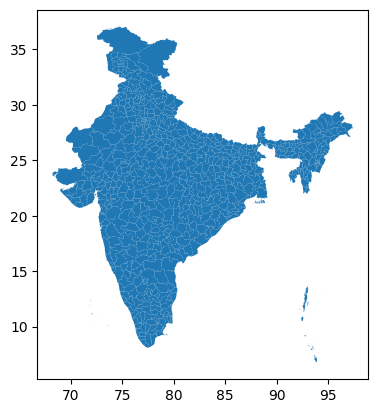

In [4]:
Ind.plot()

<Axes: >

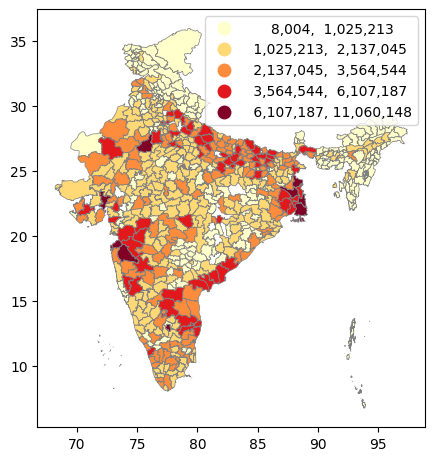

In [5]:
Ind.plot(figsize=(5,6),column='totalpopul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})
#Ind.dtypes

In [6]:
Ind.dtypes

objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

# PS1

## CRIME

In [7]:
! wget -q -O education.csv https://drive.google.com/uc?id=1ckGy6E6jDCLkhQgZnDcG8pV4KjqHpuFb&export=download
! wget -q -O crime.csv https://drive.google.com/uc?id=18RF0JXp9V1TnAd_EFy1Sy72wKrQQXLIt&export=download

In [8]:
df_edu = pd.read_csv("education.csv")
df_crime = pd.read_csv("crime.csv")

In [9]:
Ind['distname']=Ind['distname'].str.upper()
df_crime['District']=df_crime['District'].str.upper()
df_crime.rename(columns={'District': 'distname'}, inplace=True)

In [61]:
df_pop_crime = pd.merge(Ind, df_crime, on='distname',how='inner',indicator=True)
df_pop_crime[['distname','Total Cognizable IPC crimes','totalpopul','_merge']]

,distname,Total Cognizable IPC crimes,totalpopul,_merge
0,NAINITAL,1095,954605.0,both
1,DEHRADUN,2178,1696694.0,both
2,ALMORA,139,622506.0,both
3,CHAMPAWAT,96,259648.0,both
4,UTTARKASHI,92,330086.0,both
...,...,...,...,...
481,MEDAK,6931,767428.0,both
482,NALGONDA,9254,1618416.0,both
483,ADILABAD,6036,708972.0,both
484,KHAMMAM,11022,1401639.0,both


### Population divided by crime

In [62]:
df_pop_crime["pop_by_crime"] = df_pop_crime["totalpopul"]/df_pop_crime["Total Cognizable IPC crimes"]

<Axes: >

[]

[]

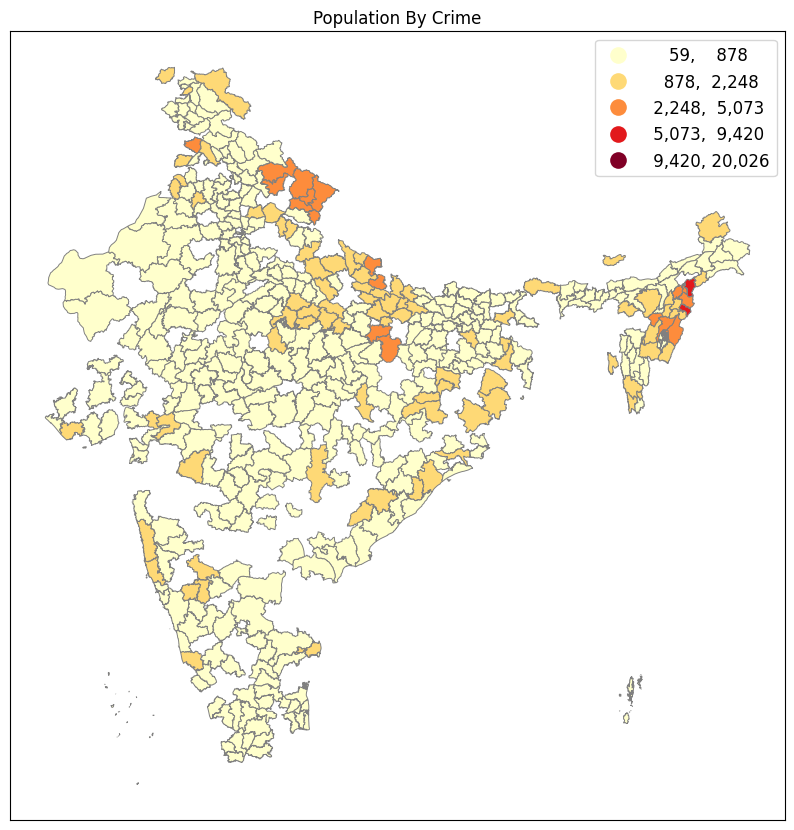

In [67]:
fig, ax = plt.subplots(1, figsize=(10,12))

df_pop_crime.plot(ax=ax,column='pop_by_crime',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.2})

ax.title.set_text("Population By Crime")
ax.set_xticks([])
ax.set_yticks([])

In [64]:
min_theft_index = df_pop_crime['pop_by_crime'].idxmin()
max_theft_index = df_pop_crime['pop_by_crime'].idxmax()


district_with_min_theft = df_pop_crime.loc[min_theft_index, 'distname']
min_theft_value = df_pop_crime.loc[min_theft_index, 'pop_by_crime']
district_with_max_theft = df_pop_crime.loc[max_theft_index, 'distname']
max_theft_value = df_pop_crime.loc[max_theft_index, 'pop_by_crime']

print("district with minimum theft:", district_with_min_theft)
print("Minimum theft value:", min_theft_value)
print("district with Max theft:", district_with_max_theft)
print("Max theft value:", max_theft_value)

district with minimum theft: NEW DELHI
Minimum theft value: 58.655101197852126
district with Max theft: WEST
Max theft value: 20025.535433070865


### Total crime

<Axes: >

[]

[]

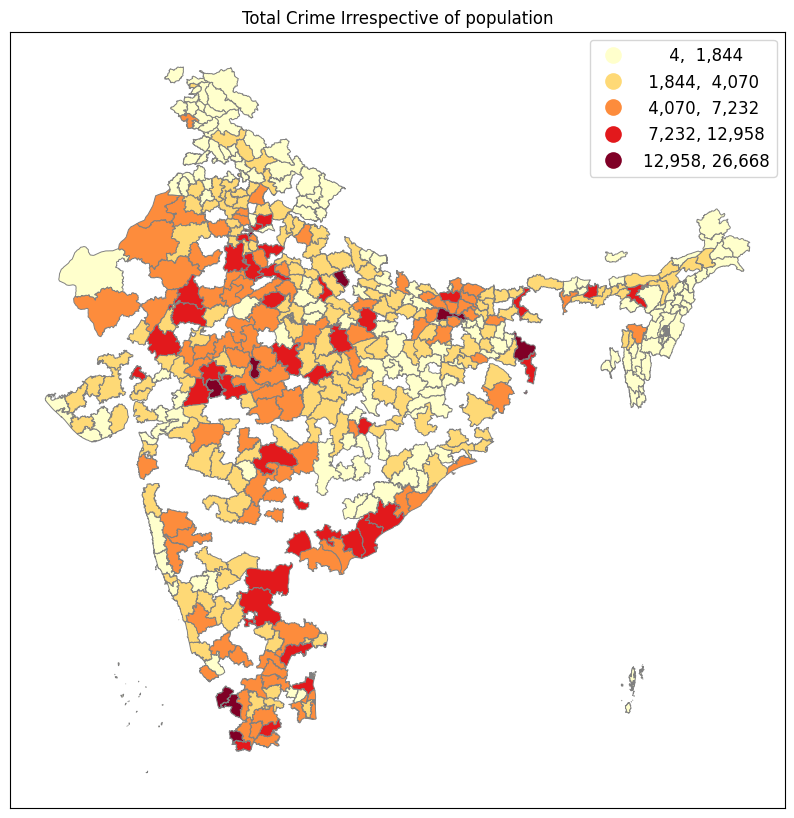

In [65]:
fig, ax = plt.subplots(1, figsize=(10,12))

df_pop_crime.plot(ax=ax,column='Total Cognizable IPC crimes',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.2}) #

ax.title.set_text("Total Crime Irrespective of population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

In [66]:
min_theft_index = df_pop_crime['Total Cognizable IPC crimes'].idxmin()
max_theft_index = df_pop_crime['Total Cognizable IPC crimes'].idxmax()


district_with_min_theft = df_pop_crime.loc[min_theft_index, 'distname']
min_theft_value = df_pop_crime.loc[min_theft_index, 'Total Cognizable IPC crimes']
district_with_max_theft = df_pop_crime.loc[max_theft_index, 'distname']
max_theft_value = df_pop_crime.loc[max_theft_index, 'Total Cognizable IPC crimes']

print("district with minimum theft:", district_with_min_theft)
print("Minimum theft value:", min_theft_value)
print("district with Max theft:", district_with_max_theft)
print("Max theft value:", max_theft_value)

district with minimum theft: DIBANG VALLEY
Minimum theft value: 4
district with Max theft: KOLKATA
Max theft value: 26668


## Education

In [14]:
nan_counts = df_edu.iloc[:,3:].isna().sum()

# Find the column with the least NaN values
column_with_least_nan = nan_counts.idxmin()
min_nan_count = nan_counts.min()
print(f"Column with the least NaN values: {column_with_least_nan}")
print(f"Number of NaN values in that column: {min_nan_count}")

Column with the least NaN values: no_of_schools
Number of NaN values in that column: 54


In [15]:
df_edu['distname']=df_edu['distname'].str.upper()


In [16]:
df_pop_edu = pd.merge(Ind, df_edu, on='distname',how='outer',indicator=True)
df_pop_edu[['distname','no_of_schools','totalpopul','_merge']]

,distname,no_of_schools,totalpopul,_merge
0,NAINITAL,1991.0,954605.0,both
1,DEHRADUN,2449.0,1696694.0,both
2,ALMORA,2241.0,622506.0,both
3,CHAMPAWAT,854.0,259648.0,both
4,UTTARKASHI,1352.0,330086.0,both
...,...,...,...,...
704,MAHABUBNAGAR,4904.0,1486777.0,both
705,KARGIL,586.0,140802.0,both
706,LEH (LADAKH),NaN,133487.0,left_only
707,LEH(LADAKH),375.0,NaN,right_only


### Total Schools

<Axes: >

[]

[]

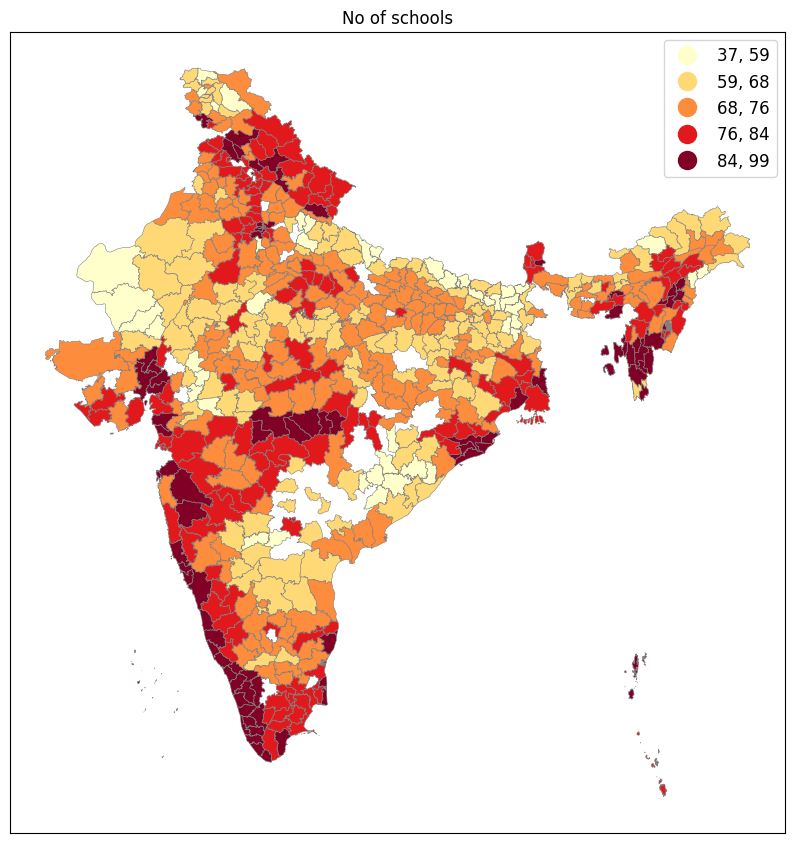

In [105]:

fig, ax = plt.subplots(1, figsize=(10,12))

df_pop_edu.plot(ax=ax,column='no_of_schools',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.4})

ax.title.set_text("No of schools")
ax.set_xticks([])
ax.set_yticks([])

In [79]:
min_schools = df_pop_edu['no_of_schools'].idxmin()
max_schools = df_pop_edu['no_of_schools'].idxmax()


district_with_min_schools = df_pop_edu.loc[min_schools, 'distname']
min_school_value = df_pop_edu.loc[min_schools, 'no_of_schools']
district_with_max_schools = df_pop_edu.loc[max_schools, 'distname']
max_school_value = df_pop_edu.loc[max_schools, 'no_of_schools']

print("district with minimum schools:", district_with_min_schools)
print("Minimum schools:", min_school_value)
print("district with Max schools:", district_with_max_schools)
print("Max schools:", max_school_value)

district with minimum schools: DIBANG VALLEY
Minimum schools: 30.0
district with Max schools: PASCHIM MEDINIPUR
Max schools: 9606.0


### Population Divided By Number Of Schools

In [80]:
df_pop_edu["popul_by_schools"] = df_pop_edu["totalpopul"]/df_pop_edu["no_of_schools"]


<Axes: >

[]

[]

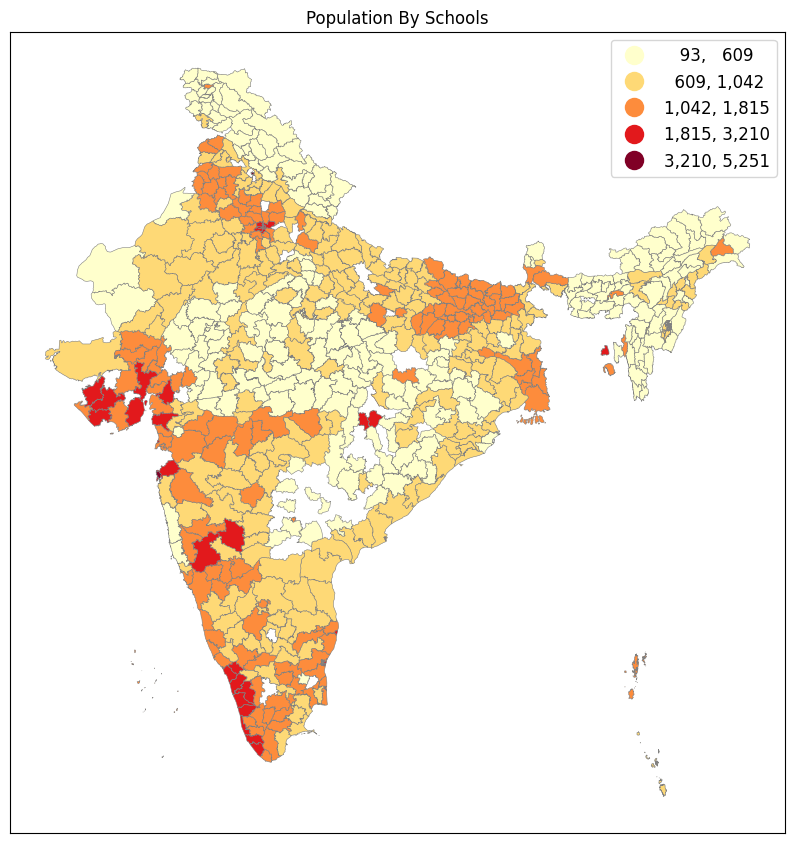

In [81]:

fig, ax = plt.subplots(1, figsize=(10,12))

df_pop_edu.plot(ax=ax,column='popul_by_schools',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.4})

ax.title.set_text("Population By Schools")
ax.set_xticks([])
ax.set_yticks([])

In [82]:
min_schools = df_pop_edu['popul_by_schools'].idxmin()
max_schools = df_pop_edu['popul_by_schools'].idxmax()


district_with_min_schools = df_pop_edu.loc[min_schools, 'distname']
min_school_value = df_pop_edu.loc[min_schools, 'no_of_schools']
district_with_max_schools = df_pop_edu.loc[max_schools, 'distname']
max_school_value = df_pop_edu.loc[max_schools, 'no_of_schools']

print("district with minimum schools:", district_with_min_schools)
print("Minimum schools wrt population:", min_school_value)
print("district with Max schools:", district_with_max_schools)
print("Max schools wrt population:", max_school_value)

district with minimum schools: BIJAPUR
Minimum schools wrt population: 2732.0
district with Max schools: CHANDIGARH
Max schools wrt population: 201.0


<Axes: >

[]

[]

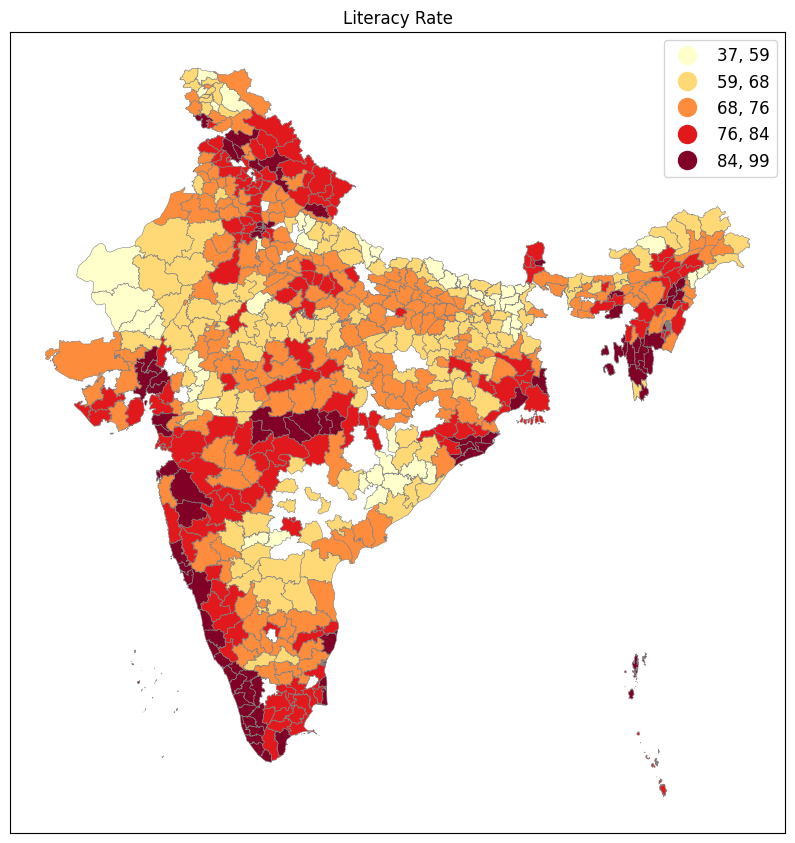

In [107]:
fig, ax = plt.subplots(1, figsize=(10,12))

df_pop_edu.plot(ax=ax,column='overall_literacy',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.4})

ax.title.set_text("Literacy Rate")
ax.set_xticks([])
ax.set_yticks([])

In [111]:
min_schools = df_pop_edu['overall_literacy'].idxmin()
max_schools = df_pop_edu['overall_literacy'].idxmax()


district_with_min_literacy = df_pop_edu.loc[min_schools, 'distname']
min_literacy_value = df_pop_edu.loc[min_schools, 'overall_literacy']
district_with_max_literacy = df_pop_edu.loc[max_schools, 'distname']
max_literacy_value = df_pop_edu.loc[max_schools, 'overall_literacy']

print("district with minimum schools:", district_with_min_literacy)
print("Minimum schools wrt population:", min_literacy_value)
print("district with Max schools:", district_with_max_literacy)
print("Max schools wrt population:", max_literacy_value)

district with minimum schools: ALIRAJPUR
Minimum schools wrt population: 37.22
district with Max schools: SERCHHIP
Max schools wrt population: 98.76


# Trying to merge crime and schools

In [84]:
Ind.dtypes

objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

In [ ]:
df_crime_edu = pd.merge()

In [20]:
df_crime_edu = pd.merge(df_crime, df_edu, on='distname',how='outer',indicator=True)


In [94]:
df_crime_edu = pd.merge(df_crime[['distname','Total Cognizable IPC crimes']], Ind[['distname','totalpopul','geometry']], on='distname',how='outer',indicator=True)


In [95]:
df_crime_edu.dtypes

distname                         object
Total Cognizable IPC crimes     float64
totalpopul                      float64
geometry                       geometry
_merge                         category
dtype: object

In [96]:
df_reqd = pd.merge(df_edu[['distname','no_of_schools','overall_literacy']],df_crime_edu ,on='distname',how='outer')


In [97]:
df_reqd.dtypes

distname                         object
no_of_schools                   float64
overall_literacy                float64
Total Cognizable IPC crimes     float64
totalpopul                      float64
geometry                       geometry
_merge                         category
dtype: object

In [99]:
df_reqd["crime_by_literacy_rate"] = df_reqd["Total Cognizable IPC crimes"] / df_reqd["overall_literacy"]
df_reqd["crime_by_schools"] = df_reqd["Total Cognizable IPC crimes"] / df_reqd["no_of_schools"]

AttributeError: ignored

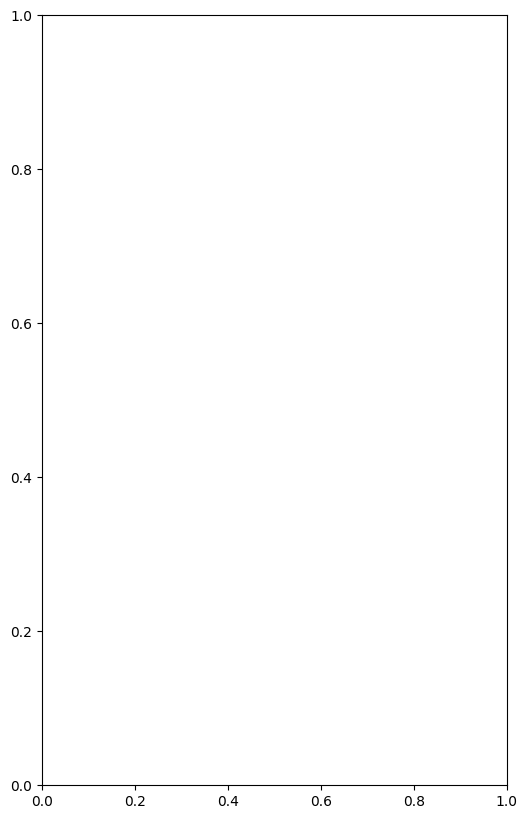

In [104]:
fig, ax = plt.subplots(1, figsize=(6,10))

df_reqd.plot(ax=ax,column='overall_literacy',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("schools by popu")
ax.set_xticks([])
ax.set_yticks([])